In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('C:/Users/91637/OneDrive/Desktop/EXCELAR ASSIGNMENT/15 XGBM & LGBM/Titanic_train.csv')
test_df = pd.read_csv('C:/Users/91637/OneDrive/Desktop/EXCELAR ASSIGNMENT/15 XGBM & LGBM/Titanic_test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(train_df.columns,test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
train_df.shape

(891, 12)

In [8]:
test_df.shape

(418, 11)

In [9]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
train_df['PassengerId'].duplicated().sum()

np.int64(0)

In [12]:
test_df['PassengerId'].duplicated().sum()

np.int64(0)

In [13]:
## Null Values
for i in train_df.columns:
    print(i,'-',train_df[i].isnull().sum())

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


In [14]:
687/891

0.7710437710437711

In [15]:
## More The 77 percent data is missing So we need to drop that Column

train_df.drop('Cabin',axis=1,inplace=True)

In [16]:
## Null Values
for i in test_df.columns:
    print(i,'-',test_df[i].isnull().sum())

PassengerId - 0
Pclass - 0
Name - 0
Sex - 0
Age - 86
SibSp - 0
Parch - 0
Ticket - 0
Fare - 1
Cabin - 327
Embarked - 0


In [17]:
test_df.drop('Cabin',axis=1,inplace=True)

In [18]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

<Axes: >

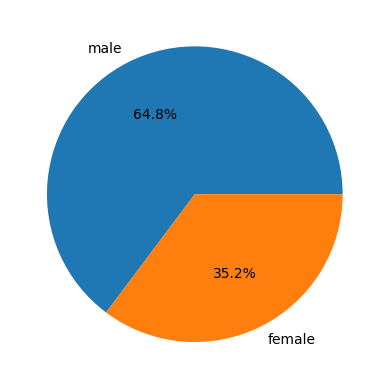

In [19]:
# Percentage Of Male and Femail in titanic
train_df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='')

<Axes: >

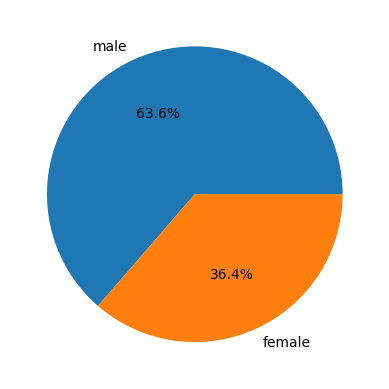

In [20]:
# Percentage Of Male and Femail in titanic
test_df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='')

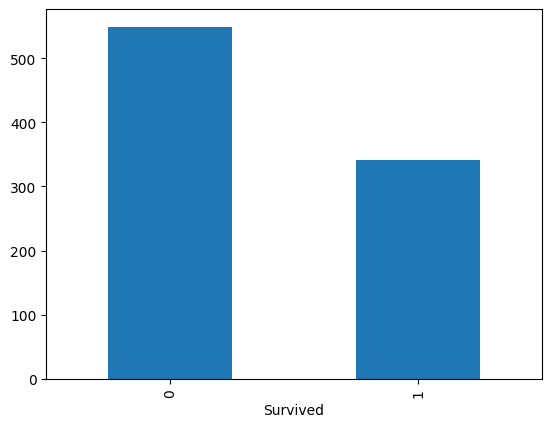

In [21]:
train_df['Survived'].value_counts().plot(kind='bar')
plt.show()

In [22]:
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [23]:
df=train_df

In [24]:
# Total male did not survive (the passenger died)
train_df[(train_df['Sex']=='male') & (train_df['Survived']==0)]['Survived'].value_counts()

Survived
0    468
Name: count, dtype: int64

In [25]:
# Total male Passanger Survied 
df[(df['Sex']=='male') &( df['Survived']==1)]['Survived'].value_counts()

Survived
1    109
Name: count, dtype: int64

In [26]:
# Total Female did not survive (the passenger died)
df[(df['Sex']=='female') & (df['Survived']==0)]['Survived'].value_counts()

Survived
0    81
Name: count, dtype: int64

In [27]:
# only 18 percent male survive
(109/577)*100

18.890814558058924

##### We Female Survive Chance is more Then Male

In [28]:
#  71 percent female survive
(233/314)*100

74.20382165605095

In [29]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [30]:
# Missing Value Imputation For Embarked
df['Embarked'].fillna('S', inplace=True)

C:\Users\91637\AppData\Local\Temp\ipykernel_14324\774830607.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [31]:
test_df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [32]:
# Missing Value Imputation For Embarked
test_df['Embarked'].fillna('S', inplace=True)

C:\Users\91637\AppData\Local\Temp\ipykernel_14324\2385430322.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Embarked'].fillna('S', inplace=True)


In [33]:
df[df['Embarked']=='S']['Age'].mean()

np.float64(29.5193345323741)

In [34]:
df[df['Embarked']=='C']['Age'].mean()

np.float64(30.81476923076923)

In [35]:
df[df['Embarked']=='Q']['Age'].mean()

np.float64(28.089285714285715)

In [36]:
df.loc[(df['Embarked'] == 'S') & (df['Age'].isnull()), 'Age'] = 29
df.loc[(df['Embarked'] == 'C') & (df['Age'].isnull()), 'Age'] = 30
df.loc[(df['Embarked'] == 'Q') & (df['Age'].isnull()), 'Age'] = 28


In [37]:
test_df[test_df['Embarked']=='S']['Age'].mean()

np.float64(28.75877192982456)

In [38]:
test_df[test_df['Embarked']=='C']['Age'].mean()

np.float64(34.73780487804878)

In [39]:
test_df[test_df['Embarked']=='Q']['Age'].mean()

np.float64(29.318181818181817)

In [40]:
test_df.loc[(test_df['Embarked'] == 'S') & (test_df['Age'].isnull()), 'Age'] = 28
test_df.loc[(test_df['Embarked'] == 'C') & (test_df['Age'].isnull()), 'Age'] = 34
test_df.loc[(test_df['Embarked'] == 'Q') & (test_df['Age'].isnull()), 'Age'] = 29

In [41]:
for i in df.columns:
    print(i,'-',df[i].isnull().sum())

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 0
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Embarked - 0


In [42]:
for i in test_df.columns:
    print(i,'-',df[i].isnull().sum())

PassengerId - 0
Pclass - 0
Name - 0
Sex - 0
Age - 0
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Embarked - 0


### Handeling Categorical Column

In [43]:
# Those Column Are Not Required For Our modekl We Just Drop The Like Name and Ticket And PassengerId
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [44]:
# Those Column Are Not Required For Our modekl We Just Drop The Like Name and Ticket And PassengerId
test_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [45]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [46]:
df=pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)


In [47]:
test_df=pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)


In [48]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [49]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


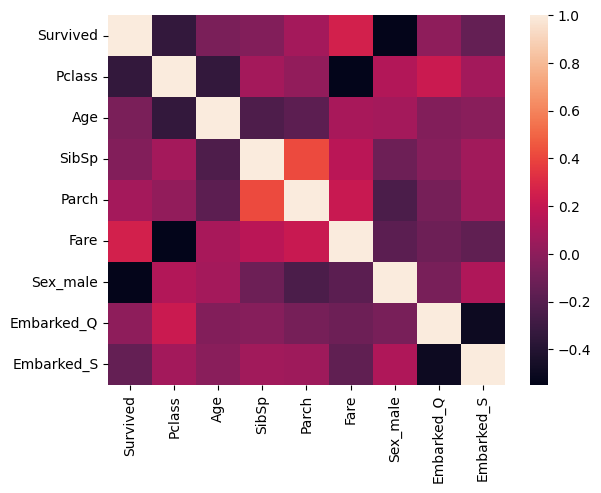

In [50]:
sns.heatmap(df.corr())
plt.show()

Statistics for 'Survived':
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64 



C:\Users\91637\AppData\Local\Temp\ipykernel_14324\1391520814.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df[col], ax=axes[3], palette='Set2')


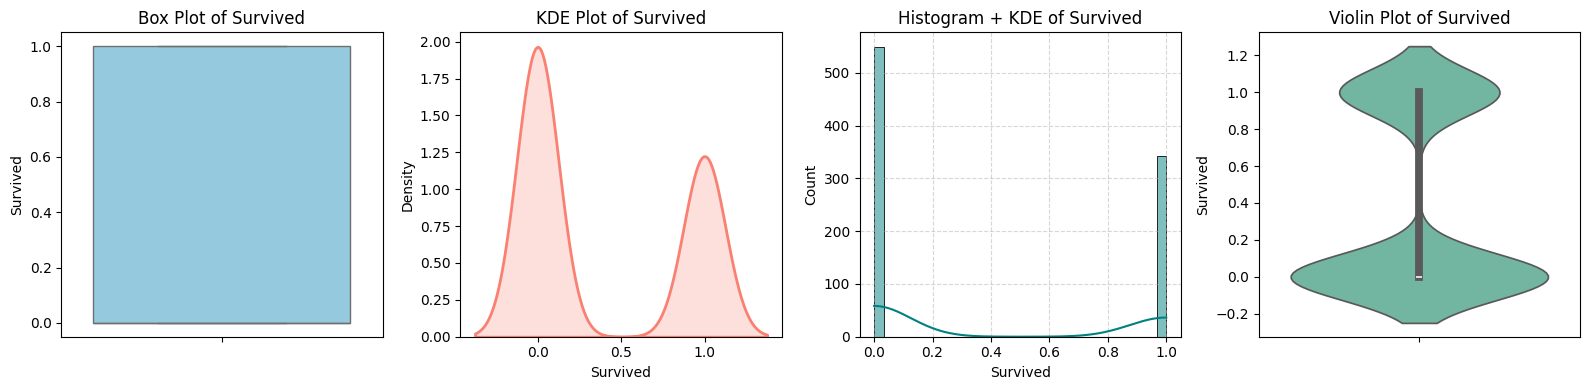

Statistics for 'Pclass':
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64 



C:\Users\91637\AppData\Local\Temp\ipykernel_14324\1391520814.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df[col], ax=axes[3], palette='Set2')


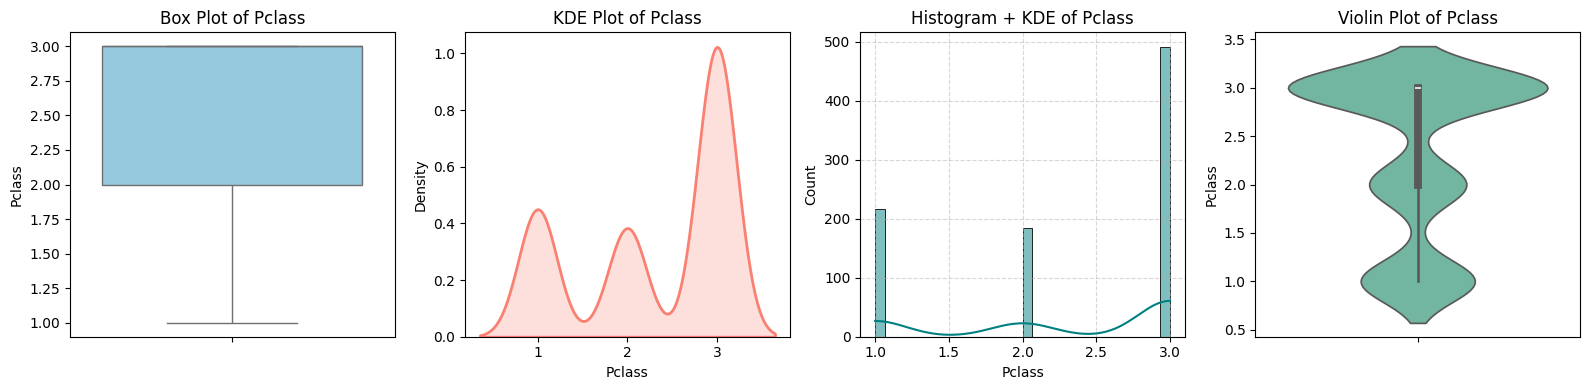

Statistics for 'Age':
count    891.000000
mean      29.547890
std       13.009294
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64 



C:\Users\91637\AppData\Local\Temp\ipykernel_14324\1391520814.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df[col], ax=axes[3], palette='Set2')


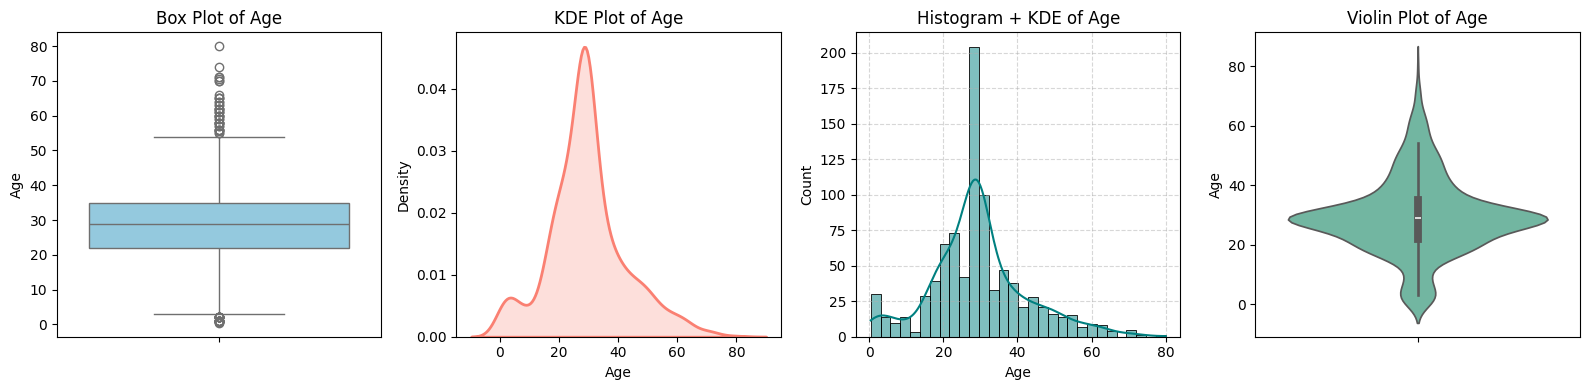

Statistics for 'SibSp':
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64 



C:\Users\91637\AppData\Local\Temp\ipykernel_14324\1391520814.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df[col], ax=axes[3], palette='Set2')


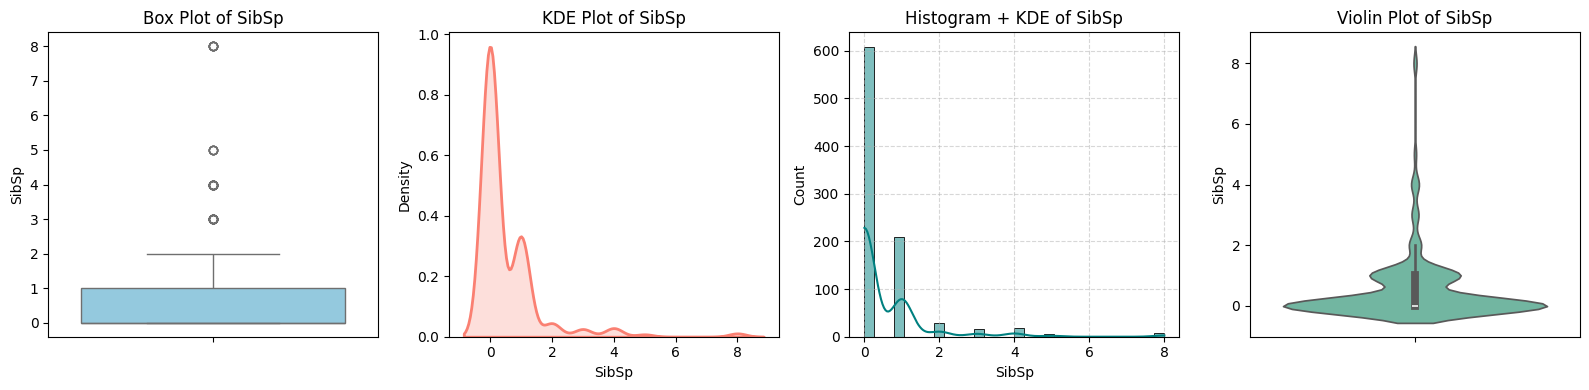

Statistics for 'Parch':
count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64 



C:\Users\91637\AppData\Local\Temp\ipykernel_14324\1391520814.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df[col], ax=axes[3], palette='Set2')


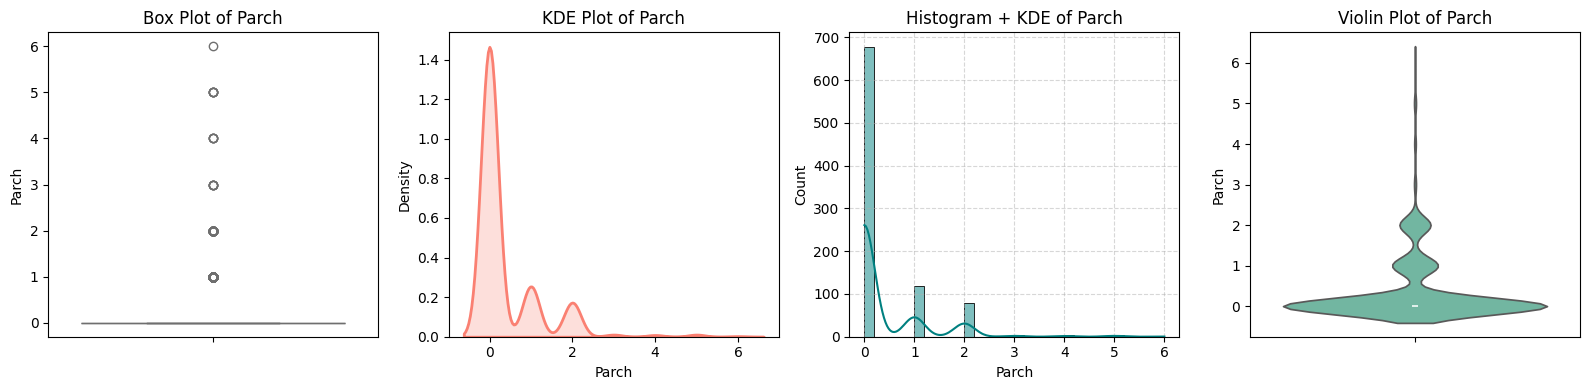

Statistics for 'Fare':
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64 



C:\Users\91637\AppData\Local\Temp\ipykernel_14324\1391520814.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df[col], ax=axes[3], palette='Set2')


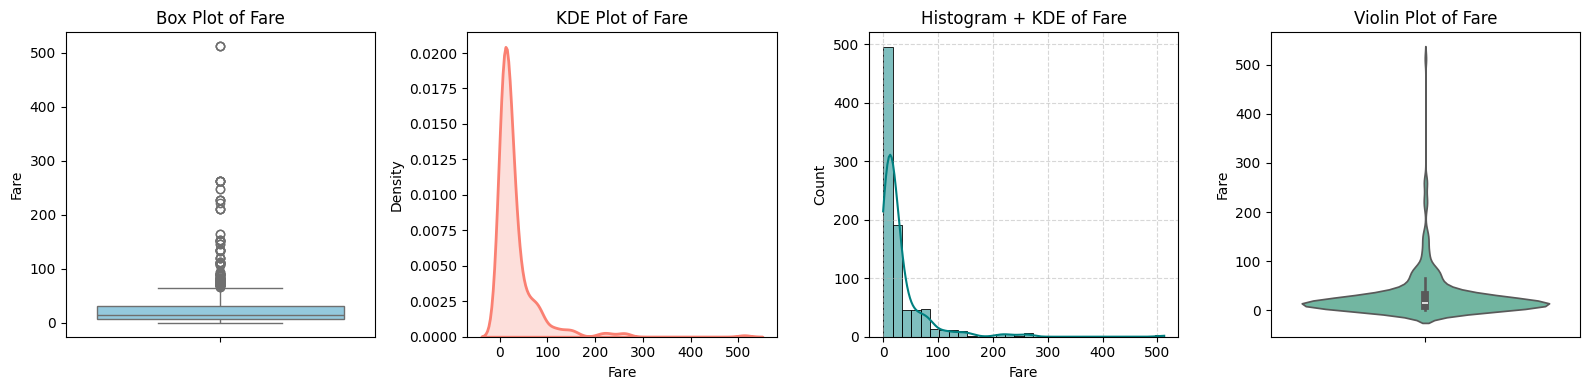

Statistics for 'Sex_male':
count    891.000000
mean       0.647587
std        0.477990
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Sex_male, dtype: float64 



C:\Users\91637\AppData\Local\Temp\ipykernel_14324\1391520814.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df[col], ax=axes[3], palette='Set2')


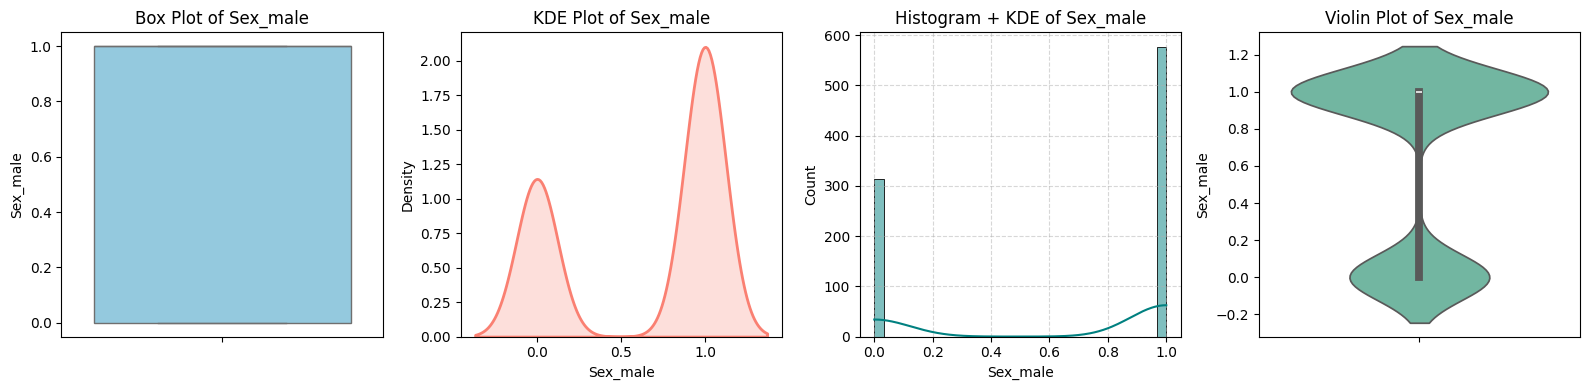

Statistics for 'Embarked_Q':
count    891.000000
mean       0.086420
std        0.281141
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Embarked_Q, dtype: float64 



C:\Users\91637\AppData\Local\Temp\ipykernel_14324\1391520814.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df[col], ax=axes[3], palette='Set2')


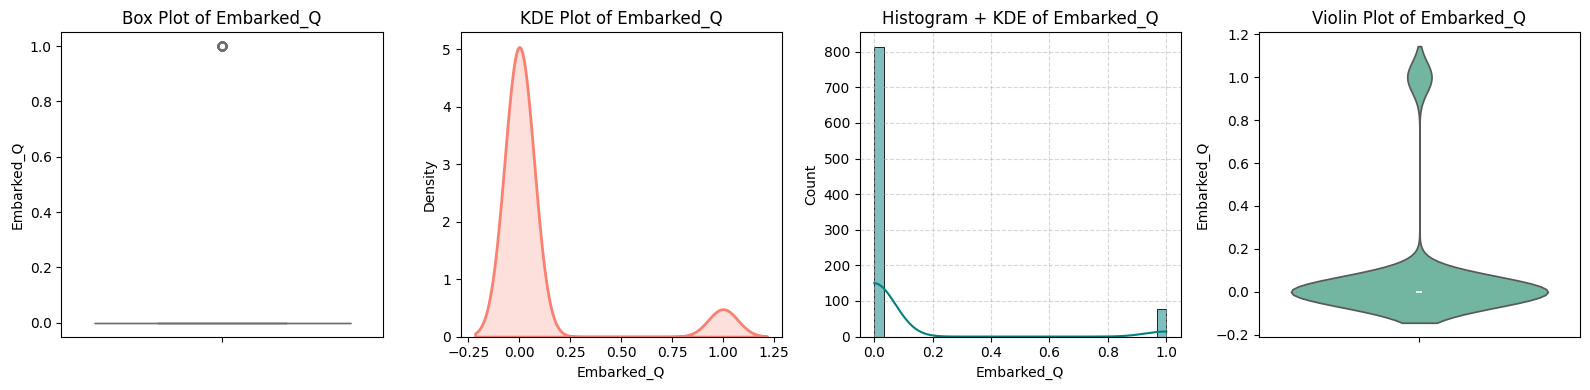

Statistics for 'Embarked_S':
count    891.000000
mean       0.725028
std        0.446751
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Embarked_S, dtype: float64 



C:\Users\91637\AppData\Local\Temp\ipykernel_14324\1391520814.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df[col], ax=axes[3], palette='Set2')


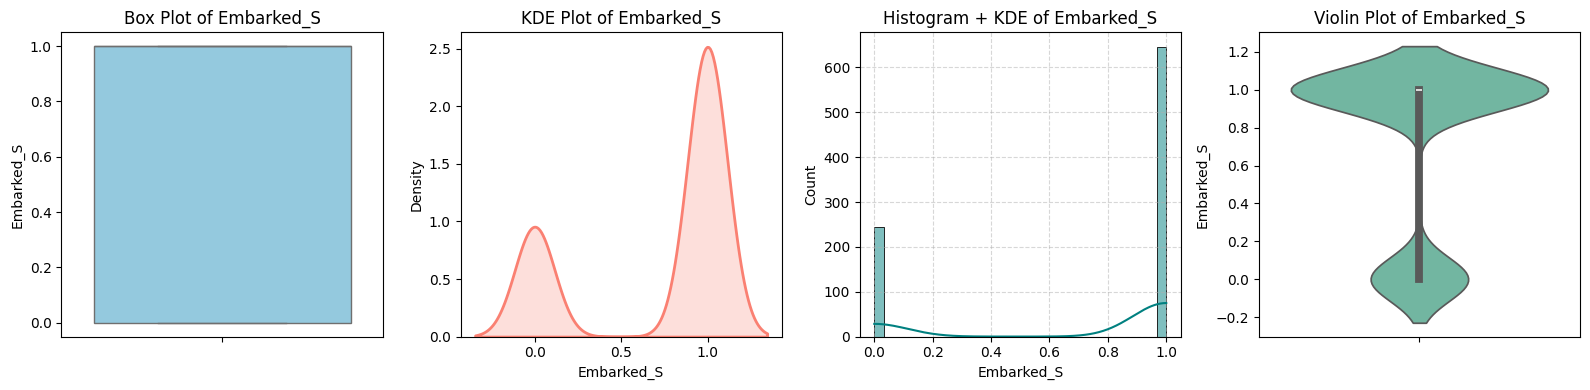

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each column in the DataFrame
for col in df.columns:
    # Print descriptive statistics
    print(f"Statistics for '{col}':")
    print(df[col].describe(), "\n")
    
    # Set up the figure with subplots for boxplot, KDE, histogram + KDE, and violin plot
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # Reduced figure size (1 row, 4 columns)

    # Box plot (1st plot)
    sns.boxplot(y=df[col], ax=axes[0], color='skyblue')
    axes[0].set_title(f'Box Plot of {col}')
    axes[0].set_ylabel(col)

    # KDE plot (2nd plot)
    sns.kdeplot(df[col], fill=True, ax=axes[1], color='salmon', linewidth=2)
    axes[1].set_title(f'KDE Plot of {col}')
    axes[1].set_xlabel(col)

    # Histogram with KDE (3rd plot)
    sns.histplot(df[col], bins=30, kde=True, ax=axes[2], color='teal')
    axes[2].set_title(f'Histogram + KDE of {col}')
    axes[2].set_xlabel(col)
    axes[2].grid(True, linestyle='--', alpha=0.5)

    # Violin plot (4th plot)
    sns.violinplot(y=df[col], ax=axes[3], palette='Set2')
    axes[3].set_title(f'Violin Plot of {col}')
    axes[3].set_ylabel(col)

    # Adjust layout to make sure plots don't overlap
    plt.tight_layout()
    plt.show()

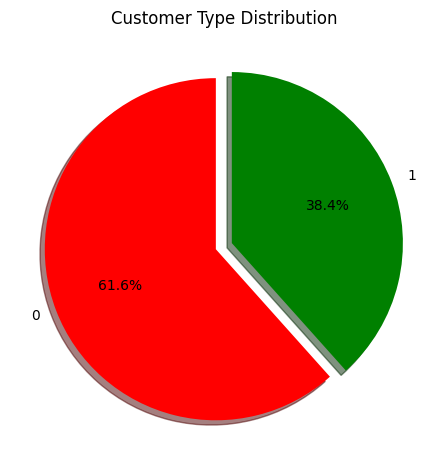

In [52]:
# Pie chart for 'Type'
df['Survived'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['red', 'green', 'blue', 'orange', 'purple', 'cyan'],
    startangle=90,
    shadow=True,
    explode=[0.05]*df['Survived'].nunique()
)

plt.ylabel('')  # Hides the y-label
plt.title('Customer Type Distribution')
plt.tight_layout()
plt.show()

In [53]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score,KFold

In [54]:
from lightgbm import LGBMClassifier

In [55]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [56]:
# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=34)

In [57]:
## Scalling all the Features
sc=StandardScaler()

In [58]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [59]:
model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.01,
    
    colsample_bytree=0.8,
    gamma=1,
    reg_lambda=1,
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False
)


In [60]:
model.fit(X_train,y_train)

C:\Users\91637\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:51:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [61]:
predict=model.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, predict)
print("Accuracy:", accuracy)

Accuracy: 0.8470149253731343


In [63]:
confusion_matrix(y_test, predict)

array([[154,  14],
       [ 27,  73]])

In [64]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)


In [65]:
from sklearn.model_selection import GridSearchCV


In [66]:
param_grid = {
    'n_estimators': [80, 100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.001],
    'subsample': [0.2, 0.3, 0.4, 0.7],
    'colsample_bytree': [0.6, 0.8, 1.0],

}

In [67]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Or 'f1', 'roc_auc', etc.
    cv=5,                # 5-fold cross-validation
    verbose=2,
    n_jobs=-1            # Use all available CPU cores
)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\91637\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:52:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     feature_weights=None, gamma=1,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     l...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=300,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [80, 100, 200, 300],
                         'subsample': [0.2, 0.3, 0.4, 0.7]},
             scoring='accuracy', verbose=2)

In [68]:
grid_search.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 300,
 'subsample': 0.4}

In [69]:
grid_search.best_score_

np.float64(0.8217419354838711)

In [70]:
lgbm=LGBMClassifier(n_estimators=80)

In [71]:
lgbm.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 242, number of negative: 381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.388443 -> initscore=-0.453862
[LightGBM] [Info] Start training from score -0.453862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(n_estimators=80)

In [72]:
predict=lgbm.predict(X_test)

C:\Users\91637\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [73]:
accuracy = accuracy_score(y_test, predict)
print("Accuracy:", accuracy)

Accuracy: 0.8544776119402985


In [74]:
param_grid = {
    'n_estimators': [80,100, 110,200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 70],      # Controls model complexity
    'subsample': [0.8, 1.0],         # Fraction of data used per tree
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used per tree
}

In [75]:
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='accuracy',  # Or 'f1', 'roc_auc', etc.
    cv=5,                # 5-fold cross-validation
    verbose=2,
    n_jobs=-1            # Use all available CPU cores
)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[LightGBM] [Info] Number of positive: 242, number of negative: 381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.388443 -> initscore=-0.453862
[LightGBM] [Info] Start training from score -0.453862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

GridSearchCV(cv=5, estimator=LGBMClassifier(n_estimators=80), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [80, 100, 110, 200, 300],
                         'num_leaves': [31, 50, 70], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [76]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'n_estimators': 80,
 'num_leaves': 31,
 'subsample': 0.8}

In [77]:
grid_search.best_score_

np.float64(0.8217548387096775)

### Cross Validation Score Comefrom LGBM : 82.175  and xgboost :82.174  The Result is Quait Similar Now We Use Xgboost as My Final Model

In [78]:
{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 300,
 'subsample': 0.4}

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 300,
 'subsample': 0.4}

In [79]:
Final_model=XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=1.0,


)

# XGBClassifier(
#     n_estimators=300,
#     max_depth=4,
#     learning_rate=0.01,
    
#     colsample_bytree=0.8,
#     gamma=1,
#     reg_lambda=1,
#     objective='binary:logistic',
#     eval_metric='auc',
#     use_label_encoder=False
# )

In [80]:
Final_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [81]:
predict=Final_model.predict(X_test)

In [82]:
accuracy = accuracy_score(y_test, predict)
print("Accuracy:", accuracy)

Accuracy: 0.8470149253731343


In [83]:
confusion_matrix(y_test, predict)

array([[154,  14],
       [ 27,  73]])

In [84]:
probability_pred=Final_model.predict_proba(X_test)[:,1]

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, probability_pred)

Best Threshold (maximizing TPR - FPR): 0.5253
True Positive Rate: 0.7300
False Positive Rate: 0.0595


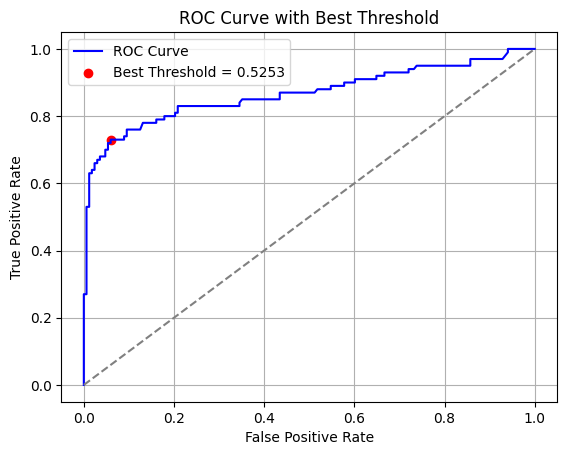

In [86]:
j_scores = tpr - fpr
best_index = np.argmax(j_scores)
best_threshold = thresholds[best_index]

# Step 7: Print best threshold
print(f"Best Threshold (maximizing TPR - FPR): {best_threshold:.4f}")
print(f"True Positive Rate: {tpr[best_index]:.4f}")
print(f"False Positive Rate: {fpr[best_index]:.4f}")

# Step 8: Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.scatter(fpr[best_index], tpr[best_index], color='red', label=f'Best Threshold = {best_threshold:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Best Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
probability_pred=Final_model.predict_proba(X_test)[:,1]

In [88]:
l=[]
for i in probability_pred:
    if i > 0.5253:
        l.append(1)

    else:
        l.append(0)

In [89]:
accuracy = accuracy_score(y_test, l)
print("Accuracy:", accuracy)

Accuracy: 0.8582089552238806


In [90]:
confusion_matrix(y_test, predict)

array([[154,  14],
       [ 27,  73]])

In [91]:
confusion_matrix(y_test, l)

array([[158,  10],
       [ 28,  72]])